<a href="https://colab.research.google.com/github/Avaneesh1609/EV_Charging_Stations/blob/main/EV_Charging_Station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    df_stations_world = pd.read_csv('/content/charging_stations_2025_world.csv',encoding='latin1')
    df_country_summary = pd.read_csv('/content/country_summary_2025.csv')
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: One or more files not found. Please ensure all CSVs are in the directory. Error: {e}")
    exit()

All datasets loaded successfully.


In [6]:
print("DATA SET'S INFORMATION")
print("World Charging Stations : \n",df_stations_world.info())
print("\n")
print("Country Summary : \n",df_country_summary.info())

DATA SET'S INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242417 entries, 0 to 242416
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              242417 non-null  int64  
 1   name            242417 non-null  object 
 2   city            220228 non-null  object 
 3   country_code    242417 non-null  object 
 4   state_province  172419 non-null  object 
 5   latitude        242417 non-null  float64
 6   longitude       242417 non-null  float64
 7   ports           242417 non-null  int64  
 8   power_kw        237757 non-null  float64
 9   power_class     242417 non-null  object 
 10  is_fast_dc      242417 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 18.7+ MB
World Charging Stations : 
 None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------    

In [7]:
print("DATA SET'S STATISTICS")
print(df_stations_world.describe())
print(df_country_summary.describe())

DATA SET'S STATISTICS
                  id       latitude      longitude          ports  \
count  242417.000000  242417.000000  242417.000000  242417.000000   
mean   204039.926519      43.253894     -32.074160       1.959277   
std    101789.186799      12.692335      57.652645       3.931007   
min      2389.000000     -55.811599    -164.848855      -4.000000   
25%    122882.000000      38.859333     -81.644018       1.000000   
50%    208085.000000      44.414623      -2.867264       1.000000   
75%    280795.000000      51.413890       7.883693       2.000000   
max    460650.000000      81.736061     178.369254     503.000000   

             power_kw  
count   237757.000000  
mean        35.253735  
std       2051.557432  
min          0.000000  
25%          3.700000  
50%         11.000000  
75%         22.000000  
max    1000000.000000  
           stations
count    121.000000
mean    2003.446281
std     8453.871780
min        1.000000
25%        6.000000
50%       55.000000


In [8]:
print("TOP 5 ROWS OF DATA SETS")
print("Country Summary of 2025")
print(df_country_summary.head())
print("World Charging stations of 2025")
print(df_stations_world.head())

TOP 5 ROWS OF DATA SETS
Country Summary of 2025
  country_code  stations
0           US     82138
1           GB     26825
2           DE     23373
3           ES     17825
4           CA     16490
World Charging stations of 2025
       id                         name     city country_code state_province  \
0  307660             Av. de Tarragona  Andorra           AD            NaN   
1  301207        Parquing Costa Rodona   Encamp           AD            NaN   
2  301206                  Hotel Naudi      NaN           AD            NaN   
3  301205  Hotel Piolets Soldeu Centre      NaN           AD            NaN   
4  301204                 Hotel Serras      NaN           AD            NaN   

    latitude  longitude  ports  power_kw         power_class  is_fast_dc  
0  42.505254   1.528861     10     300.0  DC_ULTRA_(>=150kW)        True  
1  42.537213   1.727014     10      22.0   AC_HIGH_(22-49kW)       False  
2  42.576811   1.666061      1      11.0    AC_L2_(7.5-21kW)       Fal

In [10]:
print("BOTTOM  ROWS OF DATA SET")
print("Country summary")
print(df_country_summary.tail())
print("Charging Station World")
print(df_stations_world.tail())

BOTTOM  ROWS OF DATA SET
Country summary
    country_code  stations
116           AF         1
117           UZ         1
118           MM         1
119           GT         1
120           KG         1
Charging Station World
            id                     name          city country_code  \
242412  105286              Pick 'n Pay     Cape Town           ZA   
242413   79380      BMW Cedar Isle Auto      Fourways           ZA   
242414   23789           Melrose Nissan  Johannesburg           ZA   
242415   23657  Nissan Mcarthy Randburg      Randburg           ZA   
242416   23243         Roodeport Nissan    Roodepoort           ZA   

           state_province   latitude  longitude  ports  power_kw  \
242412  City of Cape Town -33.903020  18.419719      2       7.0   
242413            Gauteng -26.020846  28.001618      1     125.0   
242414                NaN -26.129126  28.068905      1       NaN   
242415            Gauteng -26.088826  27.982802      1       NaN   
242416       

In [11]:
#Data Handling
df_stations_world['state_province'] = df_stations_world['state_province'].fillna('Unknown')
df_stations_world['city'] = df_stations_world['city'].fillna('Unknown')
df_stations_world['power_kw'] = df_stations_world['power_kw'].fillna(0)

In [12]:
print("NULL VALUES OF THE DATA SETS")
print(df_country_summary.isna().sum())
print(df_stations_world.isna().sum())

NULL VALUES OF THE DATA SETS
country_code    0
stations        0
dtype: int64
id                0
name              0
city              0
country_code      0
state_province    0
latitude          0
longitude         0
ports             0
power_kw          0
power_class       0
is_fast_dc        0
dtype: int64


In [13]:
print("HANDLING MISSING VALUES")
print(df_country_summary.fillna(0))
print(df_stations_world.fillna(0))

HANDLING MISSING VALUES
    country_code  stations
0             US     82138
1             GB     26825
2             DE     23373
3             ES     17825
4             CA     16490
..           ...       ...
116           AF         1
117           UZ         1
118           MM         1
119           GT         1
120           KG         1

[121 rows x 2 columns]
            id                         name          city country_code  \
0       307660             Av. de Tarragona       Andorra           AD   
1       301207        Parquing Costa Rodona        Encamp           AD   
2       301206                  Hotel Naudi       Unknown           AD   
3       301205  Hotel Piolets Soldeu Centre       Unknown           AD   
4       301204                 Hotel Serras       Unknown           AD   
...        ...                          ...           ...          ...   
242412  105286                  Pick 'n Pay     Cape Town           ZA   
242413   79380          BMW Cedar Is

In [14]:
df_top_10 = df_country_summary.sort_values(by='stations', ascending=False).head(10)
print(f"Top 10 Countries by Stations:\n{df_top_10[['country_code', 'stations']]}")

Top 10 Countries by Stations:
  country_code  stations
0           US     82138
1           GB     26825
2           DE     23373
3           ES     17825
4           CA     16490
5           FR     13820
6           IT     10354
7           NL      8091
8           SE      4953
9           NO      4790


In [15]:
average_ports=df_stations_world['ports'].mean()
print("Average Charging ports in the World : ",average_ports)
total_ports=df_stations_world['ports'].sum()
print("Total no. of Ports in the World : ",total_ports)

Average Charging ports in the World :  1.959276783393904
Total no. of Ports in the World :  474962


In [16]:
df_stations_world['state_province'] = df_stations_world['state_province'].str.lower().str.strip()
corrections = {
    'keral': 'kerala',
    'keraka': 'kerala',
    'lerala': 'kerala',
    'ka': 'karnataka',
    'karnatak': 'karnataka',
    'karnataka': 'karnataka',
    'tamilnadu': 'tamil nadu',
    'tamilnadu ': 'tamil nadu',
    'tamil nadu ': 'tamil nadu',
    'tamil nasdu': 'tamil nadu',
    'mahrashtra': 'maharashtra',
    'west bengal': 'west bengal',
    'villupuram': 'tamil nadu',
    'chennai': 'tamil nadu',
    'bangalore urban': 'karnataka',
    'uttar pradesh': 'uttar pradesh',
    'uttar  pradesh': 'uttar pradesh',
    'india': pd.NA,
    'unknown': pd.NA
}
df_stations_world['state_province'] = df_stations_world['state_province'].replace(corrections).str.capitalize()
indian_ports=len(df_stations_world[df_stations_world['country_code']=='IN'])
print("ports in india : ",indian_ports)
indian_ports=df_stations_world[df_stations_world['country_code']=='IN']
ports_by_state = indian_ports['state_province'].value_counts()
print("Number of ports by Indian states: ",ports_by_state)


ports in india :  1188
Number of ports by Indian states:  state_province
Kerala            454
Karnataka         362
Tamil nadu        182
Rajasthan          34
Delhi              30
Haryana            27
Gujarat            23
Uttar pradesh      21
Maharashtra        16
Telangana           7
West bengal         6
Goa                 6
Andhra pradesh      3
Madhya pradesh      2
Punjab              2
Puducherry          1
Assam               1
Bihar               1
Name: count, dtype: int64


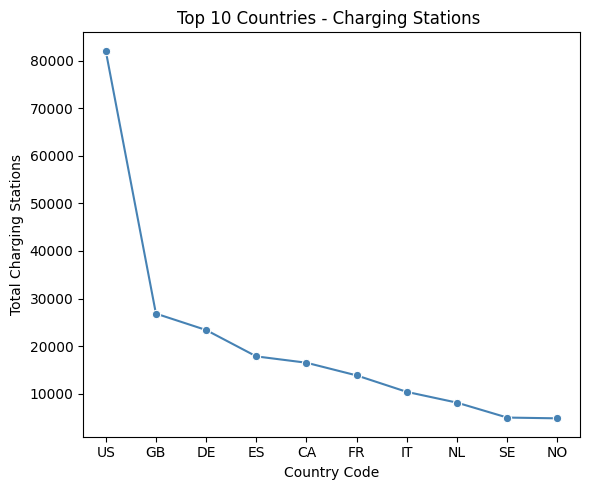

In [20]:
plt.figure(figsize=(6,5))
sns.lineplot(
    x='country_code',
    y='stations',
    data=df_top_10,
    marker='o',
    linestyle='-',
    color='steelblue'
)
plt.title('Top 10 Countries - Charging Stations ')
plt.xlabel('Country Code')
plt.ylabel('Total Charging Stations')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4061400942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


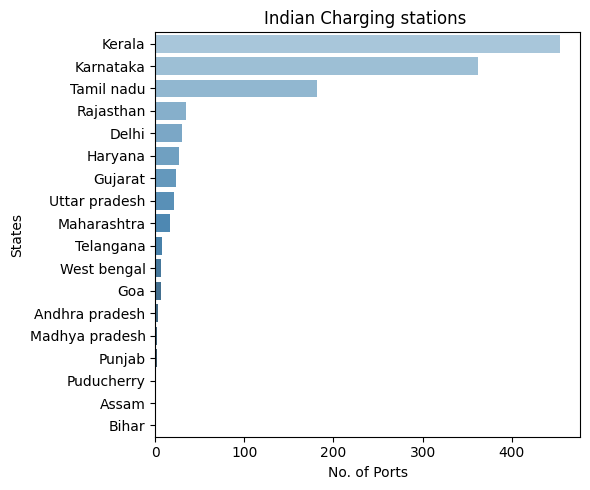

In [22]:
plt.figure(figsize=(6,5))
sns.barplot(
    x=ports_by_state.values,
    y=ports_by_state.index,
    palette='Blues_d',
)
plt.title('Indian Charging stations ')
plt.xlabel('No. of Ports')
plt.ylabel('States')
plt.tight_layout()
plt.show()

          Power_Class   Count
0      AC_L1_(<7.5kW)  107144
1   AC_HIGH_(22-49kW)   55542
2  DC_FAST_(50-149kW)   37329
3    AC_L2_(7.5-21kW)   24238
4  DC_ULTRA_(>=150kW)   13504


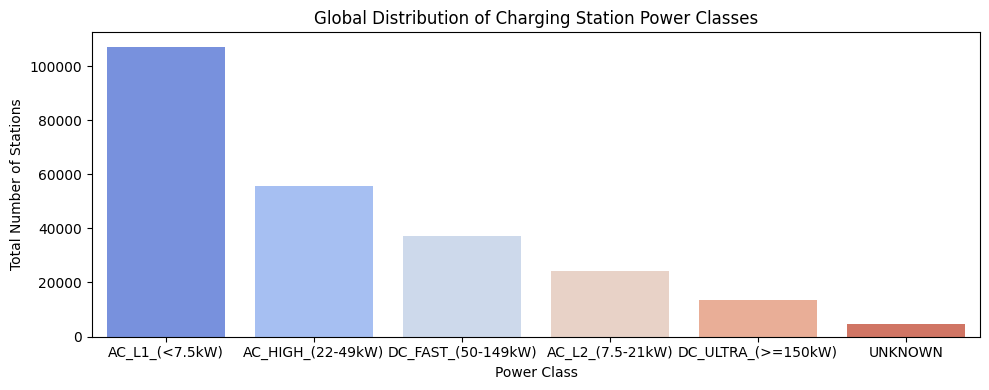

In [28]:
power_class_counts = df_stations_world['power_class'].value_counts().reset_index()
power_class_counts.columns = ['Power_Class', 'Count']
print(power_class_counts.head())
plt.figure(figsize=(10,4))
sns.barplot(
    x='Power_Class',
    y='Count',
    data=power_class_counts,
    palette='coolwarm',
    hue='Power_Class',
    legend=False

)
plt.title('Global Distribution of Charging Station Power Classes')
plt.xlabel('Power Class')
plt.ylabel('Total Number of Stations')
plt.tight_layout()
plt.show()


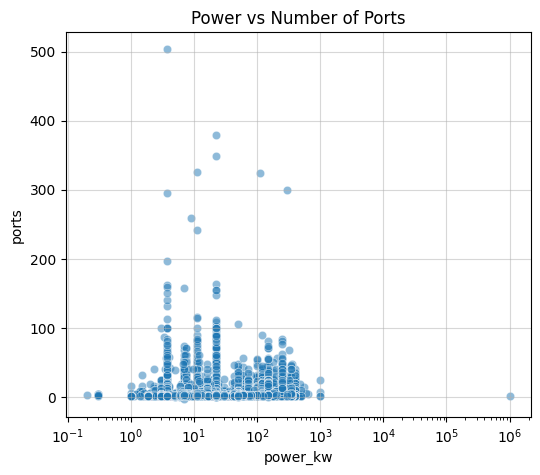

In [30]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='power_kw',
    y='ports',
    data=df_stations_world,
    alpha=0.5
)
plt.xscale('log')
plt.title('Power vs Number of Ports')
plt.grid(True,linestyle='-', alpha=0.5)
plt.show()

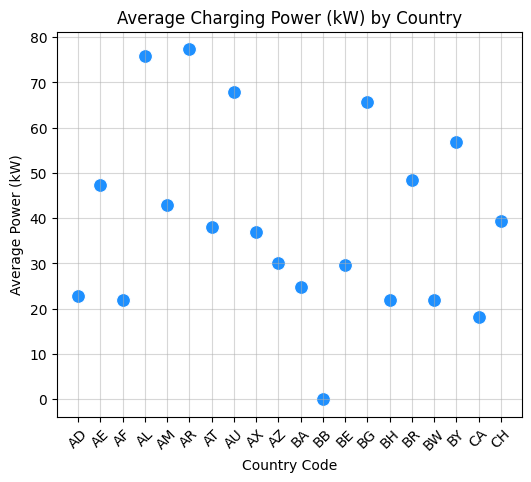

In [31]:
country_stats = df_stations_world.groupby('country_code')['power_kw'].mean().reset_index()
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='country_code',
    y='power_kw',
    data=country_stats.head(20),
    s=100,
    color='dodgerblue'
)
plt.title('Average Charging Power (kW) by Country')
plt.xlabel('Country Code')
plt.ylabel('Average Power (kW)')
plt.xticks(rotation=45)
plt.grid(True,linestyle='-', alpha=0.5)
plt.show()


In [32]:
df_stations_world = df_stations_world.dropna(subset=['is_fast_dc', 'ports', 'latitude', 'longitude', 'country_code'])
label_enc = LabelEncoder() #converting text to number
df_stations_world['country_encode'] = label_enc.fit_transform(df_stations_world['country_code'].astype(str)) #fit -> groups similar rows as single row
df_stations_world['is_fast_dc_encoded'] = label_enc.fit_transform(df_stations_world['is_fast_dc'].astype(str)) #transform -> asigning dense rank for each row
df_stations_world['power_class_encoded'] = label_enc.fit_transform(df_stations_world['power_class'])
X = df_stations_world[['ports', 'latitude', 'longitude', 'is_fast_dc_encoded', 'country_encode']] #features for training
y = df_stations_world['power_class_encoded']#target prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test and 80% training
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(" Accuracy percentage:", accuracy_score(y_test, y_pred)*100)
print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

 Accuracy percentage: 79.03225806451613

 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.85      0.73     11032
           1       0.90      0.88      0.89     21565
           2       0.71      0.36      0.48      4887
           3       0.81      0.96      0.88      7408
           4       0.78      0.39      0.52      2683
           5       0.00      0.00      0.00       909

    accuracy                           0.79     48484
   macro avg       0.64      0.57      0.58     48484
weighted avg       0.78      0.79      0.77     48484



In [33]:
df_stations_world = df_stations_world.dropna(subset=['country_code', 'is_fast_dc'])
df_stations_world['is_fast_dc'] = df_stations_world['is_fast_dc'].astype(str).str.lower().isin(['true', 'yes', '1'])
region_stats = df_stations_world.groupby('country_code').agg(
    total_stations=('ports', 'sum'),
    fast_stations=('is_fast_dc', 'sum')
).reset_index()
region_stats['fast_ratio'] = (region_stats['fast_stations'] / region_stats['total_stations']) * 100
lagging_regions = region_stats.sort_values(by='fast_ratio', ascending=True)
print("Regions lagging in fast charger deployment:")
print(lagging_regions['country_code'].head(10))
print("Total number of stations per Country : ",region_stats['fast_stations'].value_counts().sum())
print("Number of lagging stations per Country : ",region_stats['fast_stations'].value_counts()[0])

Regions lagging in fast charger deployment:
2     AF
11    BB
14    BH
16    BW
29    EC
43    GT
39    GG
33    ET
40    GH
59    KE
Name: country_code, dtype: object
Total number of stations per Country :  121
Number of lagging stations per Country :  22


In [34]:
df_stations_world = df_stations_world.merge(region_stats[['country_code', 'fast_ratio']], on='country_code', how='left')
X = df_stations_world[['latitude', 'longitude', 'fast_ratio']]
y = df_stations_world['is_fast_dc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Prediction Accuracy(Fast charging based on Country):", accuracy_score(y_test, y_pred)*100)

Prediction Accuracy(Fast charging based on Country): 80.51522151637653
